# Q.1 Root finding
- by bisection method
- the Golden Mean reqursive

In [1]:
# Bisection method
function bisection(f, a, b, NMAX, TOL)
    N = 0
    while N <= NMAX
        c = (a + b) / 2
        #println(a, " ", c, " ", b)
        if ((f(c) == 0) || ((b-a)/2 < TOL))
            return c 
        end
        if f(c)/f(a) > 0
            a = c 
        else
            b = c
        end
        N += 1
    end
    return a
end

function func(x)
    return x*x - x - 1
end 

func (generic function with 1 method)

In [2]:
a = 0 
b = 3 # area of search
NMAX = 100 # max iterations
TOL = 2^(-16) # error toleration
print(bisection(func, a, b, NMAX, TOL))

1.6180229187011719

In [4]:
# reqursive golden mean
function golden_mean(x_0, NMAX)
    if NMAX <= 0 return x_0 end
    return golden_mean(1+1/x_0, NMAX-1)
end

golden_mean (generic function with 1 method)

In [5]:
x_0 = 1 # starting point
NMAX = 100 # max iterations
print(golden_mean(x_0, NMAX))

1.618033988749895

### Golden Mean
```math
x^2 - x - 1 = 0 
```
```math
x + 1 = x^2 | /x
```
```math
1 + \frac{1}{x} = x
```

# Q.2 Finding inverses.
Newton's method
```math
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
```
our function is:
```math
f(x) = \frac{1}{x} - a = 0
```
```math
f'(x) = -\frac{1}{x^2}
```
then the Newton's method becomes
```math
x_{n+1} = x_n - \frac{\frac{1}{x_n} - a}{-\frac{1}{x_n^2}}
```
```math
x_{n+1} = x_n + x_n^2 \cdot (\frac{1}{x_n} - a)
```
```math
x_{n+1} = x_n + x_n  - a \cdot x_n
```
```math
x_{n+1} = x_n \cdot(2 - a x_n)
```

In [6]:
function inverses(x_n, a, NMAX)
    if NMAX <= 0 return x_n end
    inverses((x_n*(2-a*x_n)), a, NMAX-1)
end

inverses (generic function with 1 method)

In [9]:
x = 0.001
a = 0.1
NMAX = 1000
println([inverses(x, a, NMAX), 1/a])

[10.0, 10.0]


# Inverse of a matrix

In [32]:
function inverses_matrix(a, NMAX)
    I = zeros(size(a))
    for i in 1:size(a, 1) I[i, i] = 1 end
    x_n = 1/100 * a
    function inverses_matrix_internal(x_n, a, I, NMAX)
        if NMAX <= 0 return x_n end
        inverses_matrix_internal((x_n * (2 * I - a * x_n)), a, I, NMAX-1)
    end
    return inverses_matrix_internal(x_n, a, I, NMAX)
end

inverses_matrix (generic function with 3 methods)

In [80]:
A = [11 0.486395; 5.43656 1.28172]
NMAX = 100

display(inverses_matrix(A, NMAX))
display(inv(A))
display(inverses_matrix(A, NMAX) * A)

2×2 Array{Float64,2}:
  0.111896  -0.0424628
 -0.474618   0.960313 

2×2 Array{Float64,2}:
  0.111896  -0.0424628
 -0.474618   0.960313 

2×2 Array{Float64,2}:
  1.0          0.0
 -8.88178e-16  1.0

I spent so much time at this looking for errors, and it tourn out to be that choise of X is that important, not only A!

# Q.3 Complex **i** as a 2x2 matrix.

In [7]:
imat = [ 0 -1; 1 0 ]
function print_imat(f)
    println(f[1,1], " + ", f[2, 1], "i")
end
print_imat(imat^2)
print_imat(exp(imat * pi))
print_imat(exp(imat * pi / 2))

-1 + 0i
-0.9999999999999999 + 2.351274992194946e-16i
1.501337291432472e-16 + 1.0i


# Q.4  Gaussian integral

In [34]:
# simpson_req is adaptive recursive Simpson's rule | interesting case: sin(x) in [0, 2pi]
function simpsons_req(f, A, a, b, TOL=2^(-8))  
    function integrate_(f, A, a, fa, b, fb, TOL)
        n = (a+b)/2
        fn = f(A, n)
        res = (b-a)/6 * (fa + 4*fn + fb)
        if res < TOL return res 
        else return integrate_(f, A, a, fa, n, fn, TOL) + integrate_(f, A, n, fn, b, fb, TOL) end
    end
    return integrate_(f, A, a, f(A, a), b, f(A, b), TOL)
end

# iterative solution for usage to specyfic case functions
function simpsons_iter(f, A, a, b, N)
    step = (b-a)/N
    res = 0
    _a = a
    _b = a + step
    _f_a = f(A, _a)
    _f_b = f(A, _b)
    
    for _ in 1:N
        res += (_b-_a)/6*(_f_a + 4*f(A, (_a+_b)/2) + _f_b)
        _a = _b
        _b = _a + step
        _f_a = _f_b
        _f_b = f(A, _b)
    end
    return res
end

function gaussian(A, x)
    return exp(-A*(x^2))
end

gaussian (generic function with 1 method)

In [36]:
a = -2^16
b = 2^16
A = 1
TOL = 2^(-16)

#result = simpsons_req(gaussian, A, a, b, TOL)
result = simpsons_iter(gaussian, A, a, b, 2^18)

println(result, "\t", sqrt(pi/A), "\t", result - sqrt(pi/A))  

1.7724538509055159	1.7724538509055159	0.0


In [47]:
# 1D Gaussian by dr Pom Man Lo :https://numqm.netlify.app/lessons/gaussianintegrals

N = 100
rv = range(-1.0, stop=1.0, length=N)
dr = 2.0/(N-1)

# map (-1, 1) to (-Inf, Inf)
xvf = r -> r/(1-r^2)
xwf = r -> (1+r^2)/(1-r^2)^2

f = x -> exp(-x^2)

ret = 0.0

for rr in rv[1:N-1]
    #println(rr+dr/2,"\t", xwf(rr+dr/2), "\t", xvf(rr+dr/2))
    ret += dr * xwf(rr+dr/2) * f(xvf(rr+dr/2))
end

println([ret, sqrt(pi)])

[1.77245, 1.77245]


Usage of Gaussian integral (quantum mechanics)

In [39]:
A = 1 # global parameter
f = x -> exp(-A/2*(x^2))
#simpsons_req(f, A, a, b, TOL) 
f_help_res(A, x) = exp(-A*x^2)
result_help = simpsons_req(f_help_res, A, -2^8, 2^8)
fu_x(A, x) = f(x)*x*f(x)
#funkcyjka = A, x -> f(x)*x*f(x)
d_x_b = simpsons_req(fu_x , A, -2^8, 2^8) / result_help
println("<x> =", d_x_b)

fu_xx(A, x) = f(x)*x^2*f(x)
#d_xx_b = simpsons_req(fu_xx, A, -2^8, 2^8) / result_help
d_xx_b = simpsons_iter(fu_xx, A, -2^8, 2^8, 2^18) / result_help
println("<x^2> =", d_xx_b)


# one of the derivative methods described in lecture
function derivative_1ord(f, A, x0, dx=2^(-8))
    return 1/12/dx * 
        (-f(A,x0+dx+dx)
         -8*f(A,x0-dx)
         +8*f(A,x0+dx)
         +f(A,x0-dx-dx))
end

fu_help(A, x) = f(x)
p = x -> -1im*derivative_1ord(fu_help, A, x)
fu_p(A, x) = real(f(x)*p(x)) # not sure about this
d_p_b = simpsons_req(fu_p, A, -2^8, 2^8,) / result_help
println("<p> =", d_p_b)

function derivative_2ord(f, x0, dx=2^(-8))
    return (f(x0 + dx) - 2*f(x0) + f(x0 - dx))/dx/dx
end

pp = x -> -derivative_2ord((x -> f(x)), x)
fu_pp(A, x) = real(f(x)*pp(x))
d_pp_b = simpsons_req(fu_pp, A, -2^8, 2^8) / result_help
print("<p^2> =", d_pp_b)

<x> =0.0
<x^2> =0.49998885252366476
<p> =0.0
<p^2> =0.4972957813044254

In [40]:
(d_pp_b - d_p_b^2) * (d_xx_b - d_x_b^2)

0.248642347059259

# Q.5  logistic map

In [49]:
using Plots
#logistic map
logistic_map((x, r)) = r*x*(1-x)

logistic_map (generic function with 1 method)

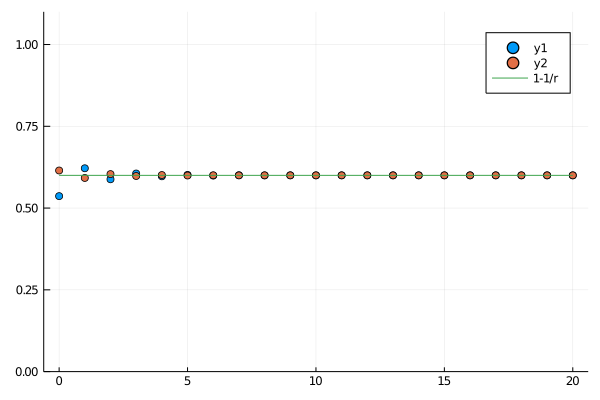

In [64]:
# Plot logistic map iterations
N1 = 20 # iterations
N2 = 2  # # starting points
r = 2.5 # logistic map parameter
arrRes = []
for _ in 1:N2
    x = rand()
    push!(arrRes, [x])
end
for j in 1:N2
    for i in 1:N1
        x = (arrRes[j][i], r) |> logistic_map
        push!(arrRes[j], x)
    end
end
Plots.scatter(ylimit=(0,1.1))
if N2>1
for j in 1:N2
    Plots.scatter!(0:N1, arrRes[j])
end
end
Plots.plot!(0:N1, x -> 1 - 1 / r, label = "1-1/r")

In [71]:
function generate_data_map(;MAX_ITER = 10_000,
    TOL = 2^(-20),
    step_ = 0.1,
    r_max = 4)

    rr = step_:step_:r_max
    data_plot = []
    # Gather data
    for r in rr
        x = rand()
        arrRes = [x]
        
        iter = 1

    

        for i in 1:100
            x = (x, r) |> logistic_map
            push!(arrRes, x)
        end

        while MAX_ITER > iter
            x = (x, r) |> logistic_map
            push!(arrRes, x)

            minTOL = min(map(x_ -> abs(x_ - x), arrRes[1:100+iter])...)

            iter += 1
            if iter >= MAX_ITER println("MAX") end
            if TOL > abs(minTOL) break end
            
        end

        # extrack final points
        iter = 1
        finalRes = [arrRes[end]]
        while true
            res = arrRes[end-iter]
            if TOL > abs(res - x) break end
            push!(finalRes, res)
            iter += 1
        end
        push!(data_plot, finalRes)
    end
    return (rr, data_plot)
end

function plot_map((rr, data_plot); save = false, name = "logistic_map.svg", analytics = false, markersize = 1)
    # Plot data
    Plots.scatter(legend=false)
    iter = 1
    for r in rr
        for y in data_plot[iter]
            Plots.scatter!([r], [y],color="grey", markersize=markersize)
        end
        iter += 1
    end
    if analytics Plots.plot!(filter(x->x>=1,rr), r->1-1/r) end
    if save Plots.savefig(name) end
    return Plots.scatter!()
end

plot_map (generic function with 1 method)

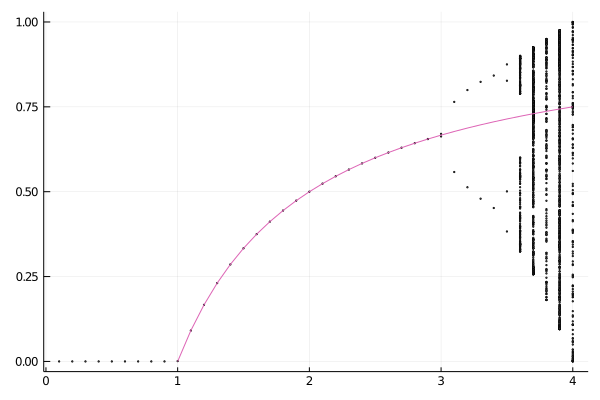

In [72]:
data = generate_data_map()
plot_map(data, analytics=true)

In [ ]:
data = generate_data_map(   MAX_ITER = 100_000,
                            TOL = 2^(-20),
                            step_ = 0.01,
                            r_max = 4)
plot_map(data, save=true, name="logistic_map_3.svg")

In [69]:
plot_map(data, save=true, name="logistic_map_4.svg", markersize=0.5)

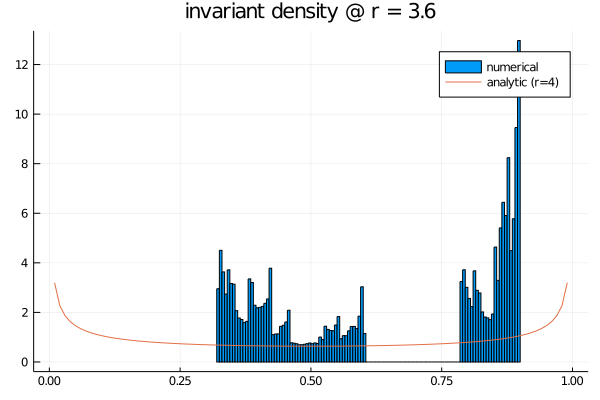

In [77]:
N1 = 200000
r = 3.6
x = rand()
arrRes = [x]

for i in 1:N1
    x = (x, r) |> logistic_map
    push!(arrRes, x)
end

# for r = 4
a_f(x) = 1 / sqrt(x * (1 - x)) / pi

histogram(arrRes[1000:N1], normalize = true, bins = 150, label="numerical")
plot!(0:0.01:1, a_f,
    label="analytic (r=4)",
    title="invariant density @ r = $r")